In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# show current working directory
home = Path.cwd()
home

PosixPath('/Users/austinlasseter/atelier/generalassembly/datdc35/05-data-visualization/code')

In [3]:
# Create a filepath to the dataset
filepath = Path.joinpath(home.parent, 'data', 'titanic.csv')
filepath

PosixPath('/Users/austinlasseter/atelier/generalassembly/datdc35/05-data-visualization/data/titanic.csv')

In [4]:
# Read in the data
df = pd.read_csv(filepath)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [6]:
# cabin class
df['cabin_class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


In [7]:
# survival
df['death_var']=df['Survived'].map({0:'died', 1: 'lived'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,death_var
0,0,3,male,22.0,7.2500,Southampton,third,died
1,1,1,female,38.0,71.2833,Cherbourg,first,lived
2,1,3,female,26.0,7.9250,Southampton,third,lived
3,1,1,female,35.0,53.1000,Southampton,first,lived
4,0,3,male,35.0,8.0500,Southampton,third,died


In [8]:
# Binning age
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
mybins=[0,20,28,38,80]

In [10]:
mylabels=['children', 'tweens', 'middle age', 'geezers']

In [11]:
df['age_groups']= pd.cut(df['Age'], bins=mybins, labels=mylabels)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,death_var,age_groups
0,0,3,male,22.0,7.2500,Southampton,third,died,tweens
1,1,1,female,38.0,71.2833,Cherbourg,first,lived,middle age
2,1,3,female,26.0,7.9250,Southampton,third,lived,tweens
3,1,1,female,35.0,53.1000,Southampton,first,lived,middle age
4,0,3,male,35.0,8.0500,Southampton,third,died,middle age


In [13]:
df['age_groups'].value_counts()

tweens        183
children      179
geezers       176
middle age    174
Name: age_groups, dtype: int64

In [14]:
df['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
farebins=[0,8,15,33,512]

In [16]:
farelabels=['wretched', 'poor', 'middle class','rich']

In [17]:
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,death_var,age_groups,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,died,tweens,wretched
1,1,1,female,38.0,71.2833,Cherbourg,first,lived,middle age,rich
2,1,3,female,26.0,7.9250,Southampton,third,lived,tweens,wretched
3,1,1,female,35.0,53.1000,Southampton,first,lived,middle age,rich
4,0,3,male,35.0,8.0500,Southampton,third,died,middle age,poor


In [19]:
df['fare_groups'].value_counts()

poor            189
middle class    185
rich            174
wretched        154
Name: fare_groups, dtype: int64

In [20]:
# new techniques:
# .map
# .cut

## Bar chart

In [21]:
df['Embarked'].value_counts()

Southampton    554
Cherbourg      130
Queenstown      28
Name: Embarked, dtype: int64

In [22]:
embarked_counts = df['Embarked'].value_counts()

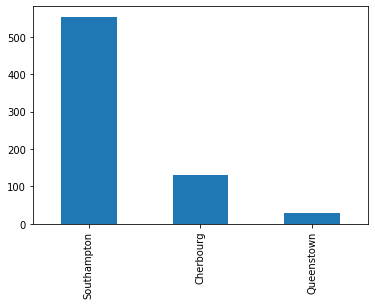

In [23]:
embarked_counts.plot(kind = 'bar');

In [24]:
# bar chart: fare groups

In [25]:
# bar chart: sex
sex_counts = df['Sex'].value_counts()
sex_counts

male      453
female    259
Name: Sex, dtype: int64

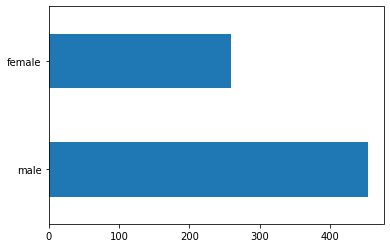

In [26]:
sex_counts.plot(kind='barh');

In [27]:
# Sex by embarkation
sex_embark = pd.crosstab(df['Sex'], df['Embarked'])
sex_embark

Embarked,Cherbourg,Queenstown,Southampton
Sex,,,
female,61,12,186
male,69,16,368


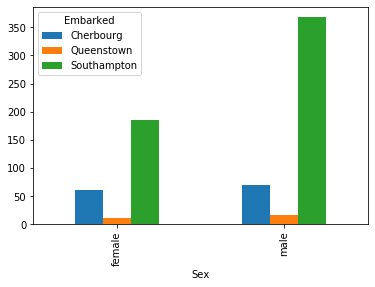

In [28]:
# grouped bar chart
sex_embark.plot(kind='bar');

In [29]:
# 
embark_sex = pd.crosstab(df['Embarked'],df['Sex'])
embark_sex

Sex,female,male
Embarked,,
Cherbourg,61,69
Queenstown,12,16
Southampton,186,368


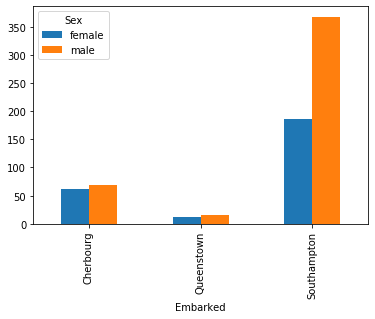

In [30]:
embark_sex.plot(kind='bar');

In [31]:
# cabin class by death var
cab_death = pd.crosstab(df['cabin_class'],df['death_var'])
cab_death

death_var,died,lived
cabin_class,,
first,64,120
second,90,83
third,270,85


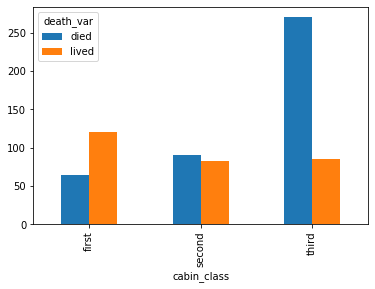

In [32]:
cab_death.plot(kind='bar')

# Bar charts with categorical and numeric variables

In [33]:
# average survival
df['Survived'].mean()

0.4044943820224719

In [34]:
# survival by cabin class?
cab_survive = df.groupby('cabin_class')['Survived'].mean()
cab_survive

cabin_class
first     0.652174
second    0.479769
third     0.239437
Name: Survived, dtype: float64

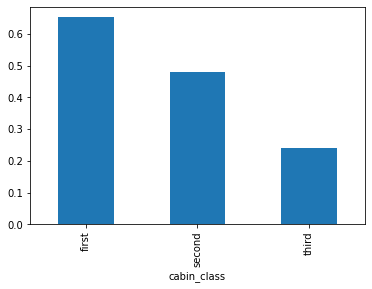

In [35]:
cab_survive.plot(kind='bar');

In [36]:
# average fare by embarkation
fare_embark = df.groupby('Embarked')['Fare'].mean()
fare_embark

Embarked
Cherbourg      68.296767
Queenstown     18.265775
Southampton    27.476284
Name: Fare, dtype: float64

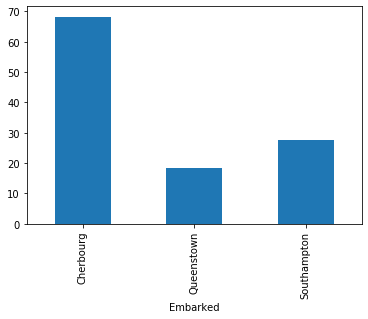

In [37]:
fare_embark.plot(kind = 'bar');

In [38]:
# cabin class, and sex
cab_age_survive = pd.crosstab(df['cabin_class'], df['Sex'])
cab_age_survive

Sex,female,male
cabin_class,,
first,83,101
second,74,99
third,102,253


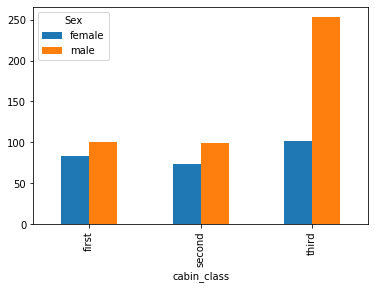

In [39]:
cab_age_survive.plot(kind = 'bar')

In [40]:
# Embarkation by average age.

In [41]:
age_embark = df.groupby('Embarked')['Age'].mean()
age_embark

Embarked
Cherbourg      30.814769
Queenstown     28.089286
Southampton    29.445397
Name: Age, dtype: float64

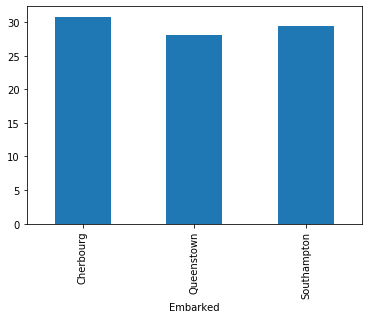

In [42]:
age_embark.plot(kind='bar')

### Bar chart with 3 variables

In [43]:
emb_surv_fare=df.groupby(['Survived', 'Embarked'])['Fare'].mean()
emb_surv_fare

Survived  Embarked   
0         Cherbourg      41.428761
          Queenstown     18.110000
          Southampton    20.573050
1         Cherbourg      85.641935
          Queenstown     18.655213
          Southampton    39.599875
Name: Fare, dtype: float64

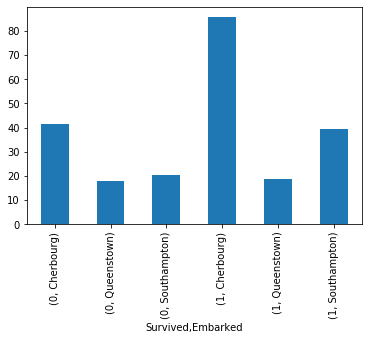

In [44]:
emb_surv_fare.plot(kind='bar');

## Scatter plots

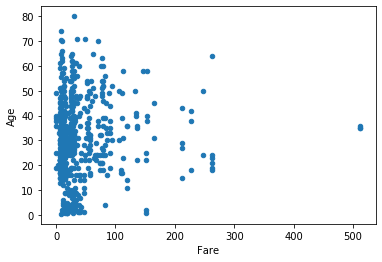

In [45]:
# scatter: age by fare
df.plot(kind = 'scatter', x='Fare', y='Age');

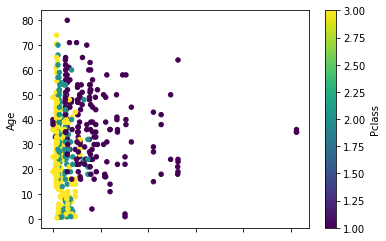

In [46]:
# scatter: age, fare, cabin class
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='viridis');

In [47]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,death_var,age_groups,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,died,tweens,wretched
1,1,1,female,38.0,71.2833,Cherbourg,first,lived,middle age,rich
2,1,3,female,26.0,7.9250,Southampton,third,lived,tweens,wretched
3,1,1,female,35.0,53.1000,Southampton,first,lived,middle age,rich
4,0,3,male,35.0,8.0500,Southampton,third,died,middle age,poor


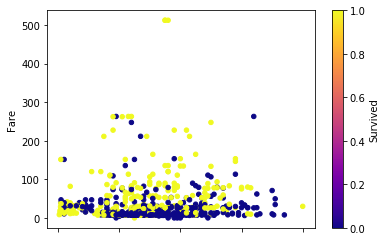

In [46]:
# scatter: age, fare, survival
df.plot(kind = 'scatter', y='Fare', x='Age', c='Survived', colormap='plasma');

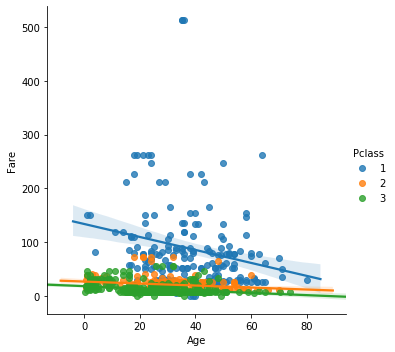

In [59]:
# Do this with seaborn
import seaborn as sns
sns.lmplot(y="Fare", x="Age",  data=df, hue='Pclass', fit_reg='False');

## Box plot

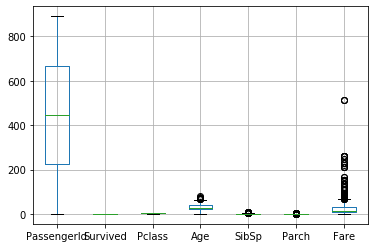

In [47]:
df.boxplot();

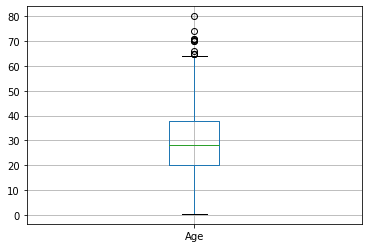

In [48]:
# boxplot age
df.boxplot(column='Age');

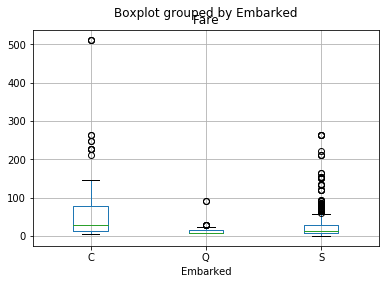

In [49]:
# boxplot fare by embarkation
df.boxplot(column='Fare', by='Embarked');

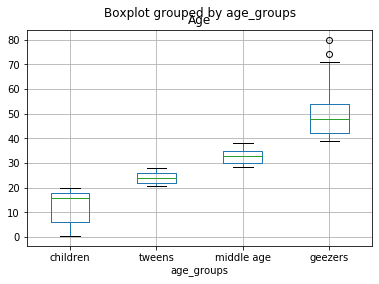

In [50]:
df.boxplot(column='Age', by='age_groups');

## Heat Maps

In [51]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [52]:
corr_matrix.index

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

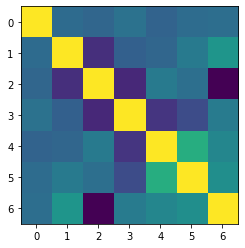

In [53]:
plt.imshow(corr_matrix)
plt.show;

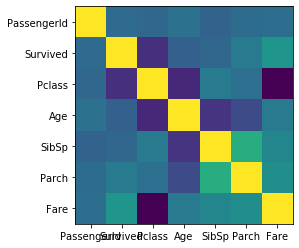

In [54]:
# add some labels
fig, axes = plt.subplots()
im = axes.imshow(corr_matrix)
# set the tick distance
axes.set_xticks(np.arange(len(corr_matrix)))
axes.set_yticks(np.arange(len(corr_matrix)))
# set the labels
axes.set_xticklabels(corr_matrix.index)
axes.set_yticklabels(corr_matrix.index)
# display
plt.show;

## Pie Charts

In [55]:
df['cabin_class'].value_counts()

third     491
first     216
second    184
Name: cabin_class, dtype: int64

In [56]:
df['cabin_class'].value_counts().index

Index(['third', 'first', 'second'], dtype='object')

In [57]:
df['cabin_class'].value_counts().values

array([491, 216, 184])

In [58]:
mylabels=df['cabin_class'].value_counts().index
mysizes=df['cabin_class'].value_counts().values

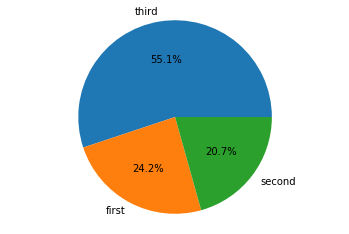

In [59]:
# pie chart
fig1, ax1= plt.subplots()
ax1.pie(mysizes, labels=mylabels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [60]:
mylabels=df['age_groups'].value_counts().index
mysizes=df['age_groups'].value_counts().values

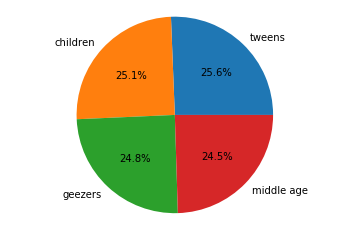

In [61]:
# pie chart
fig1, ax1= plt.subplots()
ax1.pie(mysizes, labels=mylabels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show;

## Summary

In [ ]:
df = pd.read_csv(filepath)
# Remap cabin & survival
df['cabin_class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df['death_var']=df['Survived'].map({0:'died', 1: 'lived'})
# Binning age
mybins=[0,20,28,38,80]
mylabels=['children', 'tweens', 'middle age', 'geezers']
df['age_groups']= pd.cut(df['Age'], bins=mybins, labels=mylabels)
df['age_groups'].value_counts()
# Binning Fare
farebins=[0,8,15,33,512]
farelabels=['wretched', 'poor', 'middle class','rich']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df['fare_groups'].value_counts()
# Simple Bar Charts
embarked_counts = df['Embarked'].value_counts()
embarked_counts.plot(kind = 'bar');
sex_counts = df['Sex'].value_counts()
sex_counts.plot(kind='barh');
# Crosstabs (grouped bar charts)
sex_embark = pd.crosstab(df['Sex'], df['Embarked'])
sex_embark.plot(kind='bar');
cab_death = pd.crosstab(df['cabin_class'],df['death_var'])
cab_death.plot(kind='bar')
# Bar charts with categorical and numeric variables
df['Survived'].mean()
cab_survive = df.groupby('cabin_class')['Survived'].mean()
cab_survive.plot(kind='bar');
emb_surv_fare=df.groupby(['Survived', 'Embarked'])['Fare'].mean()
emb_surv_fare.plot(kind='bar');
# Scatter plot
df.plot(kind = 'scatter', x='Fare', y='Age');
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='viridis');
df.plot(kind = 'scatter', y='Fare', x='Age', c='Survived', colormap='plasma');
# Box plot
df.boxplot(column='Age');
df.boxplot(column='Fare', by='Embarked');
df.boxplot(column='Age', by='age_groups');
# Heat map
corr_matrix = df.corr()
plt.imshow(corr_matrix)
plt.show;
# Pie chart
mylabels=df['cabin_class'].value_counts().index
mysizes=df['cabin_class'].value_counts().values
fig1, ax1= plt.subplots()
ax1.pie(mysizes, labels=mylabels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [ ]:
df = df[df['Month']=='June']